# EXPLORING THE DATA AND DEFINING SUCCESS METRICS

The end goal of this project is to investigate what makes an Airbnb listing successful. In order to do so, we must ask ourselves the following questions:
- How can we define the "success" of a listing ?
- What parameters (neighbourhood/price/amenities/...) influence most the "success" of a listing ?
- Are the same parameters important for all cities ? 

In a first phase, we investigate whether the InsideAirBnb dataset can be used to answer our questions. For computation purposes, we first look into all of the listings of a single city: Amsterdam, as this city is a popular tourist destination and its dataset is not too large. 

For this part of the project, we use data from the following files:
- `2019-09-14_Amsterdam_listings_detailed.csv`
- `2019-09-14_Amsterdam_reviews.csv`

Before proceding to the investigation, three preliminary steps are necessary: 
- evaluating the quality of the data
- defining measures of success
- analyzing the data for the defined metrics




## DATA EXPLORATION 

In [1]:
import warnings 
warnings.simplefilter('ignore')
from prettytable import PrettyTable

In [2]:
from comment_analysis import *
from feature_tools import *
from cleaning_utility import *
from geopy.distance import geodesic
import sklearn

Before attempting to find an answer to our research question, the usability of the data must be evaluated. In particular, we need to identify what kind of information our data contains. 

In [3]:
#load listing and review data

# paths Giacomo
#df_listings = pd.read_csv('/Volumes/Disk2/Courses MA3/MA3 - ADA/AIRBNB data/DataSet/2019-09-14_Amsterdam_listings_detailed.csv', header=0, low_memory = False)
#df_comments = pd.read_csv('/Volumes/Disk2/Courses MA3/MA3 - ADA/AIRBNB data/DataSet/2019-09-14_Amsterdam_reviews.csv', header=0)

# paths Pauline
#df_listings = pd.read_csv('./data/2019-09-14_Amsterdam_listings_detailed.csv', header=0)
#df_comments = pd.read_csv('./data/2019-09-14_Amsterdam_reviews.csv', header=0)

# paths Laurine
df_listings = pd.read_csv('../data/2019-09-14_Amsterdam_listings_detailed.csv', header=0)
df_comments = pd.read_csv('../data/2019-09-14_Amsterdam_reviews.csv', header=0)

In order to analyze the data contained in the '...listings_detailed.csv' file, we proceed in answering the following questions:

    1. How many listings are there in this city ? Are they all unique ?
    2. What information can we get for a particular listing ?
    3. Are there missing values ? Do they make us lose valuable information ?
    4. Can the data be used as such or should it be transformed ?


In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190914033014,2019-09-14,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
1,20168,https://www.airbnb.com/rooms/20168,20190914033014,2019-09-14,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.48
2,25428,https://www.airbnb.com/rooms/25428,20190914033014,2019-09-14,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20190914033014,2019-09-14,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20190914033014,2019-09-14,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.67


In [5]:
# check proportion of missing features
total_cell_nbr = df_listings.shape[0]*df_listings.shape[1]
percentage_missing = df_listings.isna().sum().sum()/total_cell_nbr*100
print('Fraction of missing values in the dataframe: '+ str(round(percentage_missing,3))+'%')
print('')
print('The eight columns with the most missing data are (with % Nan in column): ')
display(df_listings.isna().sum().divide(df_listings.shape[0]/100).nlargest(8).round(2))
print('')
frac_in_5 = df_listings.isna().sum().nlargest(8).sum()/df_listings.isna().sum().sum()
print('Together, they account for: '+ str(round(frac_in_5*100,2)) +'% of the missing data.')
print('')

# check if listing ids are duplicated 
print('There are: ' + str(df_listings.duplicated('id', keep = False).sum()) + ' duplicated listing ids')

# check if listing ids are Nan or empty values
print('There are : ' + str(df_listings['id'].isna().sum()) + ' Nan values under id')
print('There are : ' + str(df_listings.id.loc[df_listings['id'] == ''].sum()) + ' empty values under id')

Fraction of missing values in the dataframe: 13.997%

The eight columns with the most missing data are (with % Nan in column): 


thumbnail_url                   100.00
medium_url                      100.00
xl_picture_url                  100.00
host_acceptance_rate            100.00
neighbourhood_group_cleansed    100.00
license                          99.84
square_feet                      98.17
monthly_price                    93.40
dtype: float64


Together, they account for: 53.34% of the missing data.

There are: 0 duplicated listing ids
There are : 0 Nan values under id
There are : 0 empty values under id


To answer the questions stated above, we can observe the following:

- There are 106 columns in this dataset, one of which is the listing id, the others all contain different types of information about the listings.
- Each row of the dataset corresponds to a different listing.
- There are no missing listing ids.
- More than half of the missing data comes from eight columns, that are for the most part not essential parameters. 
- The neighbourhood information can be obtained from an other column: 'neibourhood_cleansed'.
- The 'square_feet' column, however could have been an intersting parameter.
- Some columns contain string type data, others contain numerical values.

From this analysis, we infer that the data is of sufficient quality to build success metrics and features of listing information that impact these success metrics. We can thus proceed to the next step: defining success metrics. 




### SUCCESS METRICS

To obtain accurate representations of how successful an AirBnb listing is, we go over the different kinds of information provided by the dataset containing the details of listing and identify the best success metrics. We also look into the other files provided by the Inside Airbnb dataset to construct other metrics.

#### 1. Metric selection

In [6]:
# glimpse at the info contained in the listing dataframe
cols_names = df_listings.columns.tolist()

# nice print
nb_per_row = 2
t = PrettyTable(['Features Names', 'Features Names (cont.)'])
for i in range(0, int(np.ceil(len(cols_names)/nb_per_row))):
    if len(cols_names[2*i:nb_per_row*i+nb_per_row]) == nb_per_row:
        t.add_row(cols_names[nb_per_row*i:nb_per_row*i+nb_per_row])
    else:
        new_row = cols_names[nb_per_row*i:nb_per_row*i+nb_per_row]
        new_row = new_row + ['-']*(nb_per_row-len(new_row))
        t.add_row(new_row)
print(t)

+---------------------------------------------+----------------------------------------------+
|                Features Names               |            Features Names (cont.)            |
+---------------------------------------------+----------------------------------------------+
|                      id                     |                 listing_url                  |
|                  scrape_id                  |                 last_scraped                 |
|                     name                    |                   summary                    |
|                    space                    |                 description                  |
|             experiences_offered             |            neighborhood_overview             |
|                    notes                    |                   transit                    |
|                    access                   |                 interaction                  |
|                 house_rules                 |   

By taking a look at the columns of this dataframe, it appears that some columns would intuitively be more suited than others to be chosen as success metrics.

These columns are:
- 'review_scores_rating'
- 'review_scores_accuracy'
- 'review_scores_cleanliness'
- 'review_scores_checkin'
- 'review_scores_communication'
- 'review_scores_location'
- 'review_scores_value'
- 'reviews_per_month'

Apart from the 'reviews_per_month' column, these columns are all averages of scores given to a listing by guests. These scores give some insight into the rating of a listing.

An other aspect we want to include as metric is the frequency at which a listing booked. To do so, we identified a column potentially suited to measure the booking frequency: 'reviews_per_month'. The values in this column average the number of reviews per month for a particular listing. It should be noted that not all guests leave reviews and that guests book a stay for different amounts of time. This value is thus not an exact measure of the number of nights booked per month, but rather an approximative indicator of the demand for a listing.

As it turns out, the 'review_scores_rating' values are calculated as weighted sum of the other 'review_scores_...'.
We can thus consider that all the other scores are taken into account in this one, such that it is necessary only for this metric to be kept.

Therefore, the remaining columns of interest are:
- 'review_scores_rating'
- 'reviews_per_month'

Alternatively, we could keep all the 'review_scores_...' columns and drop 'review_scores_rating', if we want to investigate specific aspects, such as cleanliness, communication, location...


#### 2. Metric construction

<font color='red'>
    
An other quantity can be used as a measure of a listing's succes: the sentiment of the comments left by the reviewers. Comments for all the listings of a given city can be found in a '...reviews.csv' file. From this file, the comments were processed and a sentiment analysis was performed (refer to the commentsAnalysis.ipynb notebook for a complete exploration and step-by-step anlaysis of the reviews data). In doing so, we were able to extract two different measures of sentiment: the average negative and the average positive sentiments for each listing.

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND

</font>

In [7]:
# add comment sentiment metric

# analyze comment data for each listing
#_, _, comments_en_copy = analyze_comments(df_comments) #this step is very long!
#df_comments_sentiment = comments_en_copy.copy()

# as the previous step takes some time to run, the result is saved and can be loaded for further use
#df_comments_sentiment.to_pickle("./df_comments_sentiment_final.pkl")

# uncomment to load stored comment analysis data 

# path Pauline
#df_comments_sentiment = pd.read_pickle("./df_comments_sentiment_final.pkl")

# path Laurine
df_comments_sentiment = pd.read_pickle("../data/df_comments_sentiment.pkl")

In [8]:
df_comments_sentiment.to_csv("./df_comments_sentiment_final.csv")

In [9]:
# drop 'neutrality', 'negativity' and 'positivity' columns as the one of interest is compound
df_comments_sentiment.drop(columns = ['neutrality', 'positivity', 'negativity'], inplace = True)
df_comments_sentiment.head()

,compound
listing_id,
2818,0.486077
20168,0.448888
25428,0.464547
27886,0.540527
28871,0.541549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d63a898>]],
      dtype=object)

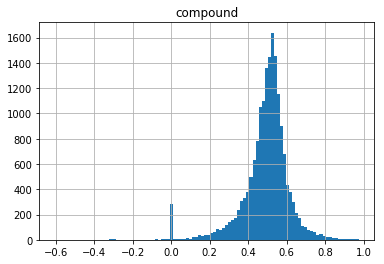

In [10]:
df_comments_sentiment.hist(bins=100)

<font color='red'>
    
From the sentiment analysis, we only keep the positivy and negativity of the overall comments for each listing.
Success can thus be defined by the 4 following metrics:

- 'review_scores_rating'
- 'reviews_per_month'
- 'positive_sentiment'
- 'negative_sentiment'

The remaining columns (not used as metrics) will be further inspected in order to pre-select features.

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND

</font>

In [11]:
# create a new dataframe for success metrics
df_success_metrics = pd.merge(df_listings[['id', 'review_scores_rating', 'reviews_per_month']],
                              df_comments_sentiment, left_on='id', right_on='listing_id')
# change index to id
df_success_metrics = df_success_metrics.set_index('id')

df_success_metrics.head()

,review_scores_rating,reviews_per_month,compound
id,,,
2818,98.0,2.11,0.486077
20168,88.0,2.48,0.448888
25428,100.0,0.15,0.464547
27886,99.0,2.14,0.540527
28871,97.0,2.67,0.541549


<font color='red'>
    
#### EXPLIQUER COMPOUND SI ON LE GARDE 
Compound works this way:
- positive sentences if compound >= 0.05
- negative sentences if compound <= -0.05
- neutral sentences if compound < 0.05

</font>

In [12]:
# <font color='red'>   
# TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND  </font>

#### 3. Metric analysis

We now look more in depth into our chosen metrics. We first need to establish what kind of data we are working with and its usability. Moreover, we visualize the how the data for each metric is distributed and whether there are correlations between the metrics. 

In [13]:
c = (df_success_metrics == '').sum(axis=0)
for col in df_success_metrics:
    print('The metric '+ col + ':')
    # check range
    print('- is in the range: ['+ str(df_success_metrics[col].min())+', '+str(df_success_metrics[col].max())+']')
    # check for Nan values
    print('- has : ' + str(df_success_metrics[col].isna().sum()) + ' Nan values')
    # check for empty values
    print('- has : ' + str(c[col]) + ' empty values')
    print('')

The metric review_scores_rating:
- is in the range: [20.0, 100.0]
- has : 224 Nan values
- has : 0 empty values

The metric reviews_per_month:
- is in the range: [0.01, 52.24]
- has : 0 Nan values
- has : 0 empty values

The metric compound:
- is in the range: [-0.6059, 0.9766]
- has : 0 Nan values
- has : 0 empty values



Our metrics are all continuous numerical values that vary in a certain range. We observe that our data only contains missing values for a single metric: 'review_scores_rating'. The corresponding rows are to be dropped, as, even though there might be interesting information for the other parameters of these listings, without the associated metric, we cannot evaluate all the aspects of their "success".

In [14]:
# drop rows with Nan values
df_success_metrics.dropna(axis = 0, inplace = True)

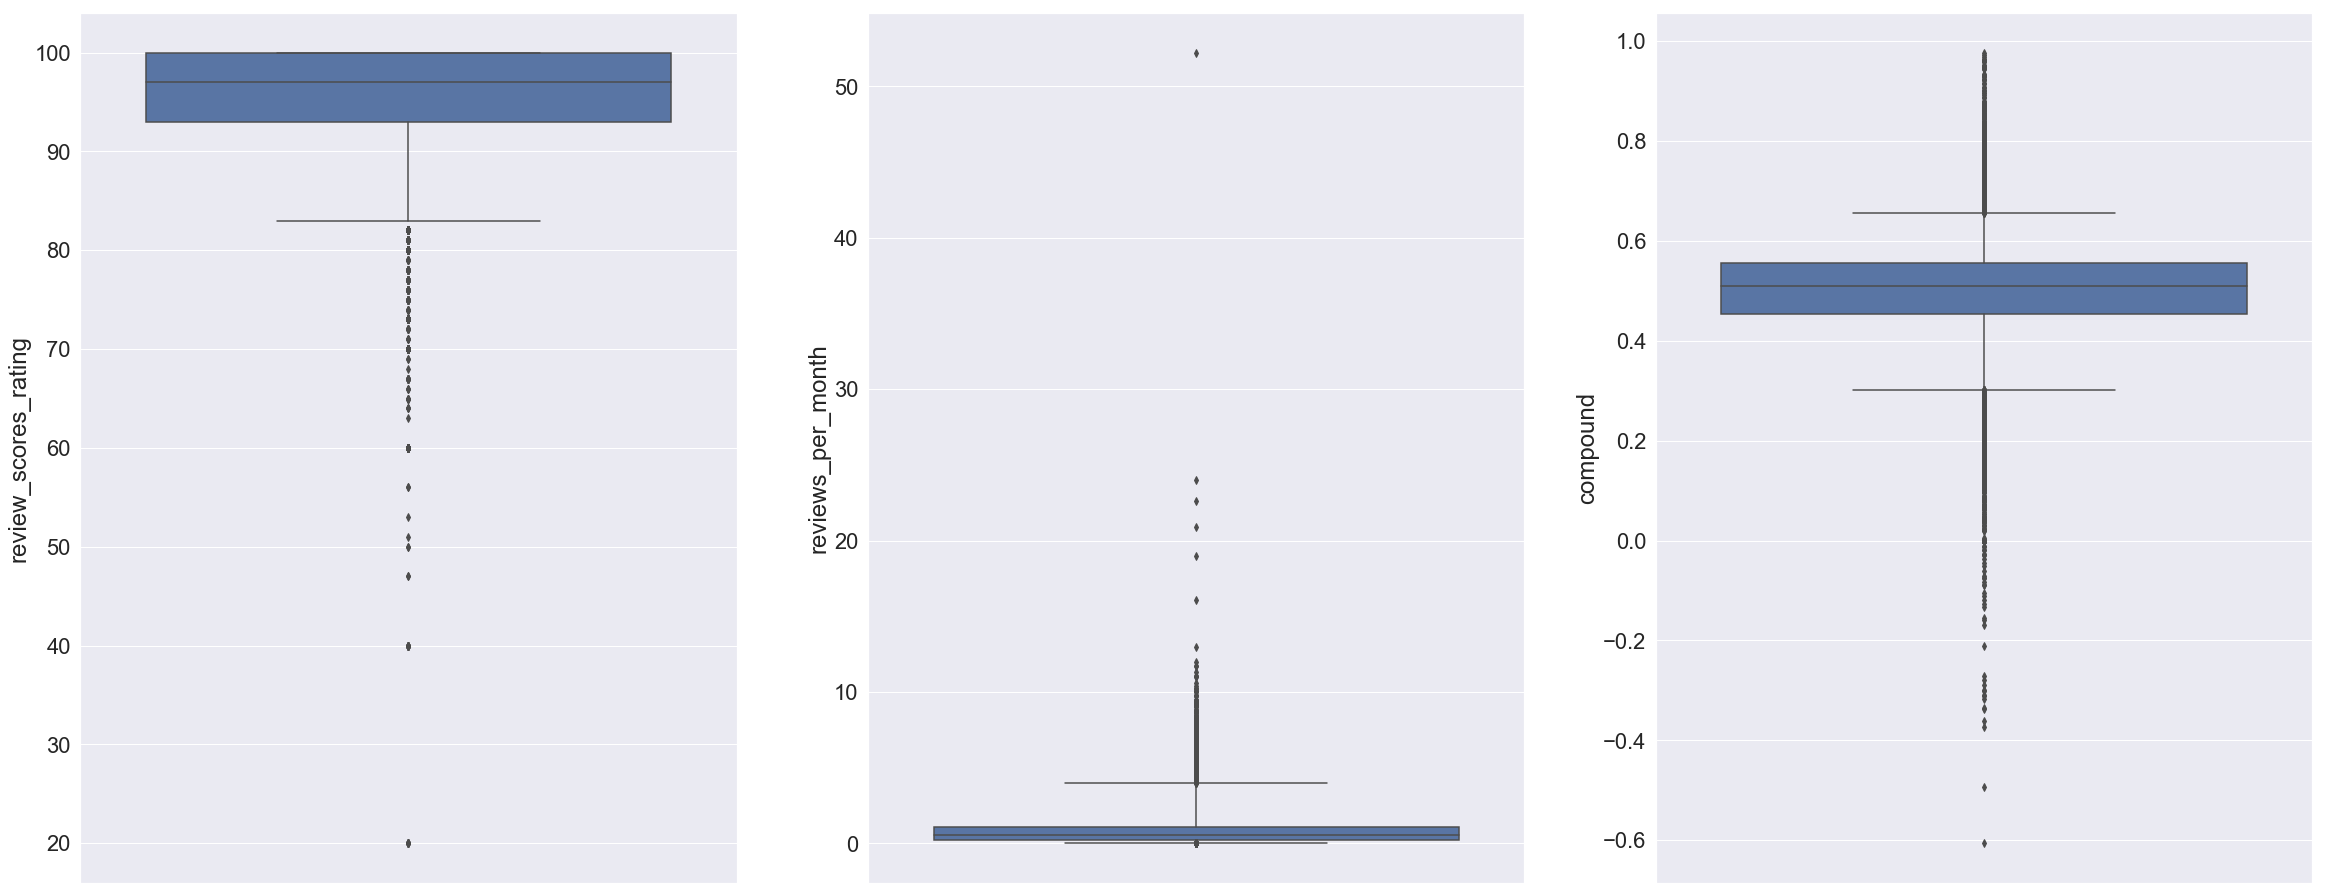

In [15]:
# create boxplots of the metrics
fig = plt.figure(figsize=(40, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(font_scale = 2)

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.boxplot(y=df_success_metrics['review_scores_rating'], whis=[5, 95])

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.boxplot(y=df_success_metrics['reviews_per_month'], whis=[5, 95])

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.boxplot(y=df_success_metrics['compound'], whis=[5, 95])

<font color='red'>   

From looking at the boxplot of the listing data for the metric 'review_scores_rating', we observe that more than 95% of the listings have overall scores above 80/100. This means that in general, people tend to leave good scores and that only a small minority of listings are badly rated. This phenomenon could be due to AirBnb setting requirements for the hosts to meet.

By observing the second boxplot, we see that more than 95% of the listings get less than 5 reviews per month. We also notice an obvious outlier at more than 50 reviews per month. Unless this listing always gets reviewed by multiple individuals in groups, this value is very unlikely. This listing should therefore be removed.

The positive sentiment of guests for listings seems to be mostly between 0.2 and 0.5, with very few listings under 0.2 and very few listings above 0.5. A gaussian distribution can be expected for this metric.

On the other hand, the negative sentiment for a listing is usually very close to 0, meaning that very few listing get mostly negative comments. 

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND  
</font>

In [16]:
# remove obvious outliers (more than 30 reviews per months)
df_success_metrics.drop(df_success_metrics[df_success_metrics.reviews_per_month > 30].index, inplace=True)

# save final success metrics dataframe
df_success_metrics.to_pickle("./df_success_metrics_final.pkl")

In [17]:
df_success_metrics.to_csv("./df_success_metrics_final.csv")

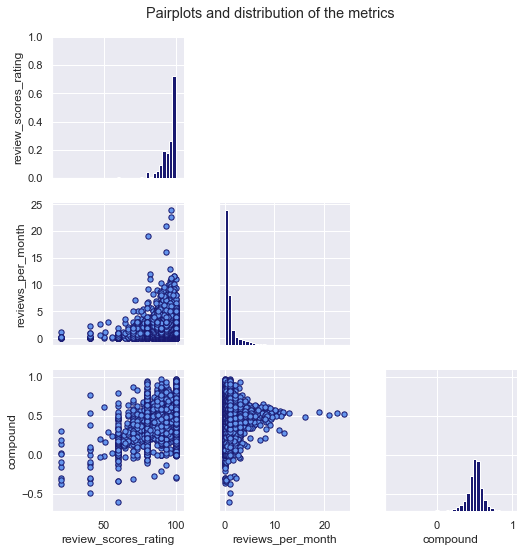

In [18]:
# plot the distribution and visualize correlation
sns.set(font_scale = 1)

# create pair grid
grid = sns.PairGrid(df_success_metrics)
grid.fig.tight_layout()
grid.fig.suptitle('Pairplots and distribution of the metrics', y=1.02)

# map plots to locations
grid = grid.map_lower(plt.scatter, edgecolor="midnightblue", s=28, color="cornflowerblue")
grid = grid.map_diag(plt.hist, bins=35, color="midnightblue")

# mask top right
for i, j in zip(*np.triu_indices_from(grid.axes, 1)):
    grid.axes[i, j].set_visible(False)

<font color='red'>   

From the distribution plots of the metrics, we observe the following:
- `review_scores_rating` : distribution seems left-skewed, as stated previously, very few listing have overall scores under 80/100.
- `reviews_per_month` : distribution seems right-skewed, most listings get very few reviews per month.
- `negativity` : distribution seems right-skewed, the average negative sentiment for a listing is usually very low.
- `positivity` : gaussian distribution.

Plotting the metrics by pairs is a way of identifying visually whether two metrics are correlated. After a first glance, we notice that no pairs of metrics are clearly linearly correlated. However, we can identify a few trends:
- a low positive sentiment in the comments seems to be correlated with a low score, but the negative sentiment value does not show an obvious correlation to the score. 
- a very negative sentiment seems to be associated with a very low (0) positive sentiment, which is expected.
- listings with more reviews per month have higher overall scores and have less to no negative sentiment in their reviews.

Given that we cannot identify a clear correlation pattern between pairs of metrics, we do not exclude any of them from the metric selection.

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND  
</font>

Now that the success metrics are chosen and cleaned, we can proceed to the next step of this project: selecting features and identifying their importance for each metric.

## MACHINE LEARNING

In this part, a features ensemble were chosen as relevant features that could influence our selected metrics. These features are listed in the variable `features_ensemble`.

The goal of this part is to perform machine learning algorithm(s) to determine and compare the importance of features in regards to each metric. To identify the most relevant features, the random forest classifier was applied to the ensemble of features for each metric. 

Two classes were used here: the `FeaturesTools` class and the `CleaningUtility` class. The first one allows to run machine learning algorithms on the features contained in a data set and to generate visual outputs. The second one defines tools to clean the data set. 

Before performing any machine learning, a few pre-processing steps were required.

In [19]:
# load data
#df_success_metrics = pd.read_pickle("./df_success_metrics_final.pkl")
#df_listings = pd.read_csv('./data/2019-09-14_Amsterdam_listings_detailed.csv')
#df_neighbourhood = pd.read_csv('./data/NaT_Amsterdam_neighbourhoods.csv')

# path Laurine
df_neighbourhood = pd.read_csv('../data/NaT_Amsterdam_neighbourhoods.csv')

In [20]:
# drop neighbourhood_group column as it is only filled with NaN
df_neighbourhood = df_neighbourhood.drop(columns = ['neighbourhood_group'])

# transform neighbourhood name into a categorical integer to create a new feature
df_neighbourhood['neighborhood_id'] = df_neighbourhood.index.values + [1]*df_neighbourhood.shape[0]

df_neighbourhood.head()

,neighbourhood,neighborhood_id
0,Bijlmer-Centrum,1
1,Bijlmer-Oost,2
2,Bos en Lommer,3
3,Buitenveldert - Zuidas,4
4,Centrum-Oost,5


In the cell above, the `neighbourhood` column is transformed into a new column `neighborhood_id` in order to create a new feature for the next steps. However, as this is not the best way to do transform this column, this will be improved in the next milestone and by transforming `neighbourhood` into one-hot labels instead into an id.

### Determine and prepare a features ensemble

In the cell below, the `features_ensemble` list is initialized. These features were selected as they seemed relevant to our analysis. The next step is to separate this ensemble in different categories in order to prepare them depending on the type of data they contain. An additional feature, `dist_to_station`,  containing the distance in meters of a listing to the nearest station is computed from a dataset containing information about public transportation systems (source: citylines.co) in different cities.


*However it should be noted that the first element of this list is `id` which is obviously not a feature but will be needed later (for merging steps).*

In [21]:
features_ensemble       = ['id','host_since', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count', 
                          'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed',
                          'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
                          'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
                          'instant_bookable', 'cancellation_policy']

In [22]:
# features are seperated depending on their types to be prepared before being used for ML
rating_features         = ['review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
date_features           = 'host_since'
bool_features           = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
list_features           = ['host_verifications', 'amenities']
price_features          = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
string_features         = ['property_type', 'cancellation_policy','room_type', 'bed_type','neighbourhood_cleansed']
rate_features           = ['host_response_rate']
replace_nan_features    = ['host_response_rate', 'host_is_superhost', 'host_total_listings_count', 'security_deposit', 'cleaning_fee', 'number_of_amenities']
replace_values          = [0, 0, 1, 0, 0, 0]

In [23]:
# CREATE THE "DISTANCE TO STATION" FEATURE


# load the stations data
# path Laurine
stations = pd.read_csv('../data/transports/Amsterdam_stations.csv')

# define a function to calculate the distance
def dist_to_nearest_station(stations_coord, listing_coord):

    dist_tmp = []
    min_distances = []
    idx = 0
    for listing in listing_coord:
        idx += 1
        print('Running.... ' + str(np.ceil((idx/len(listing_coord))*100)) + '%', end='\r')
        for station in stations_coord:
            dist_tmp.append(geodesic(station, listing).meters)
        
        min_distances.append(min(dist_tmp))
    print('\n')
    return min_distances

# extract the coordinates of the listings
listing_coord = [(df_listings.longitude.values[i], df_listings.latitude.values[i]) for i in range(0, len(df_listings.longitude.values))]

# format the coordinates of the stations
stations_long = stations.coordinates.apply(lambda x: x.split(',')[0].split('[')[1])
stations_lat = stations.coordinates.apply(lambda x: x.split(',')[-1].split(']')[0])
stations_coord = [(stations_long[i], stations_lat[i]) for i in range(0, len(stations_long))]

# add the feature to the listings DF
df_listings['dist_to_station'] = dist_to_nearest_station(stations_coord, listing_coord)

# add feature to feature ensemble
features_ensemble.append('dist_to_station')

Running.... 100.0%



In [24]:
df_listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [25]:
# create an instance of the class CleaningUtility()
cu = CleaningUtility()

In [26]:
# FEATURES PREPARATION

# using the class CleaningUtility(), features are prepared to be used 
df_features = df_listings[features_ensemble].copy()
df_features = cu.bool_to_int(df_features, bool_features)
df_features = cu.host_activity_period(df_features, date_features)
df_features = cu.list_to_number_of_services(df_features, list_features)
df_features = cu.format_price(df_features, price_features)
df_features = cu.format_rate(df_features, rate_features)
df_features = cu.replace_nan_by_values(df_features, replace_nan_features, replace_values)

# convert string_featutes to one-hot labels (-> will increase the number of columns)
df_features = cu.convert_to_one_hot_label(df_features, string_features)

# computes the price per person
df_features = cu.prices_per_person(df_features, price_features[0:-1], 'guests_included')

##############################################################
## now that all the data are numeric, convert all to float64 #
##############################################################
cols           = df_features.columns
df_features[cols] = df_features[cols].apply(pd.to_numeric, errors = 'raise')

##############################################################
############# keep only rows with non-nan values #############
##############################################################
tmp      = df_features.shape[0]
df_features = cu.select_numeric_column_only(df_features)
df_features = df_features.dropna()

##############################################################
####################### set id to index ######################
##############################################################
df_features = df_features.set_index('id')

##############################################################
##################### print cleaning info ####################
##############################################################
print('\nNumber of rows    before data set cleaning:       %.0f'%(df_listings.shape[0]))
print(  'Number of rows    after data set cleaning:        %.0f'%(tmp))
print(  'Number of rows    after removal of rows with nan: %.0f'%(df_features.shape[0]))
print(  'Number of columns before data set cleaning:       %.0f'%(df_listings.shape[1]))
print(  'Number of columns initially selected:             %.0f'%(len(features_ensemble)-1)) #-1 because id in list
print(  'Number of columns after data set cleaning:        %.0f'%(df_features.shape[1]))

display(df_features.describe())
df_features.head()

> Running bool_to_int...
> Running host_activity_period...
All activities periods extracted but some nan are present

> Running list_to_number_of_services...
> Running format_price...
> Running format_rate...
> Running replace_nan_by_values...
> Running convert_to_one_hot_label...
> Running prices_per_person...
> Running select_numeric_column_only...

Number of rows    before data set cleaning:       20244
Number of rows    after data set cleaning:        20244
Number of rows    after removal of rows with nan: 20239
Number of columns before data set cleaning:       107
Number of columns initially selected:             22
Number of columns after data set cleaning:        89


,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,security_deposit,cleaning_fee,guests_included,...,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,price_per_person,security_deposit_per_person,cleaning_fee_per_person
count,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,...,20239.000000,20239.000000,20239.000000,20239.00000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000,20239.000000
mean,55.103562,54.227877,0.153763,6.641830,0.999111,0.388409,160.410643,156.902416,32.748851,1.459657,...,0.006819,0.030239,0.064974,0.02006,0.027966,0.074806,0.071298,128.943001,120.332159,25.519432
std,23.695810,48.033332,0.360730,37.447605,0.029810,0.487400,162.961676,325.614946,27.710938,0.938646,...,0.082294,0.171248,0.246485,0.14021,0.164879,0.263085,0.257328,146.528813,275.484180,24.148247
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,1.000000,1.000000,0.000000,99.000000,0.000000,10.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,70.000000,0.000000,8.062500
50%,57.000000,86.000000,0.000000,1.000000,1.000000,0.000000,130.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,100.000000,0.000000,22.500000
75%,73.000000,100.000000,0.000000,1.000000,1.000000,1.000000,180.000000,250.000000,50.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,150.000000,150.000000,40.000000
max,133.000000,100.000000,1.000000,932.000000,1.000000,1.000000,8915.000000,4736.000000,531.000000,16.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,8915.000000,4736.000000,531.000000


,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,security_deposit,cleaning_fee,guests_included,...,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,price_per_person,security_deposit_per_person,cleaning_fee_per_person
id,,,,,,,,,,,,,,,,,,,,,
2818,133.0,100,1.0,1.0,1.0,0.0,59.0,200.0,60.0,1.0,...,0,0,0,0,0,0,0,59.0,200.0,60.0
20168,118.0,100,0.0,2.0,1.0,0.0,80.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,40.0,0.0,0.0
25428,119.0,100,0.0,2.0,1.0,0.0,125.0,300.0,40.0,2.0,...,0,0,0,0,0,0,0,62.5,150.0,20.0
27886,115.0,100,1.0,1.0,1.0,1.0,155.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,155.0,0.0,0.0
28871,113.0,100,1.0,3.0,1.0,1.0,75.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,75.0,0.0,0.0


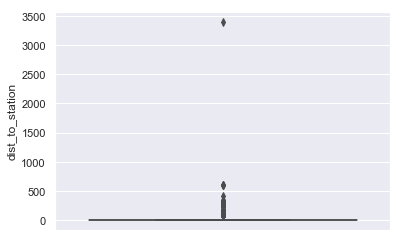

In [27]:
# plot the distribution
sns.boxplot(y=df_features['dist_to_station'], whis=[5, 95])

<font color='red'>  
There is a clear outlier that is most probably not in the center of the city !!!

A merged dataframe of the features and the metrics is created here, as this is the required format for the FeaturesTools class.

In [28]:
# merge to have metrics and features in the same dataFrame
df_features_w_metrics = pd.merge(df_features, df_success_metrics, left_on = 'id', right_on = 'id')
df_features_w_metrics.head()

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,security_deposit,cleaning_fee,guests_included,...,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,price_per_person,security_deposit_per_person,cleaning_fee_per_person,review_scores_rating,reviews_per_month,compound
id,,,,,,,,,,,,,,,,,,,,,
2818,133.0,100,1.0,1.0,1.0,0.0,59.0,200.0,60.0,1.0,...,0,0,0,0,59.0,200.0,60.0,98.0,2.11,0.486077
20168,118.0,100,0.0,2.0,1.0,0.0,80.0,0.0,0.0,2.0,...,0,0,0,0,40.0,0.0,0.0,88.0,2.48,0.448888
25428,119.0,100,0.0,2.0,1.0,0.0,125.0,300.0,40.0,2.0,...,0,0,0,0,62.5,150.0,20.0,100.0,0.15,0.464547
27886,115.0,100,1.0,1.0,1.0,1.0,155.0,0.0,0.0,1.0,...,0,0,0,0,155.0,0.0,0.0,99.0,2.14,0.540527
28871,113.0,100,1.0,3.0,1.0,1.0,75.0,0.0,0.0,1.0,...,0,0,0,0,75.0,0.0,0.0,97.0,2.67,0.541549


In [29]:
df_features_w_metrics.columns.values

array(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'dist_to_station', 'number_of_host_verifications',
       'number_of_amenities', 'property_type_Aparthotel',
       'property_type_Apartment', 'property_type_Barn',
       'property_type_Bed and breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Bus', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Campsite',
       'property_type_Casa particular (Cuba)', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Cottage',
       'property_type_Dome house', 'property_type_Earth house',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type

### Pearson correlation of features

To explore the relationship between our selected features, we perform a correlation analysis using Pearsons coefficients.

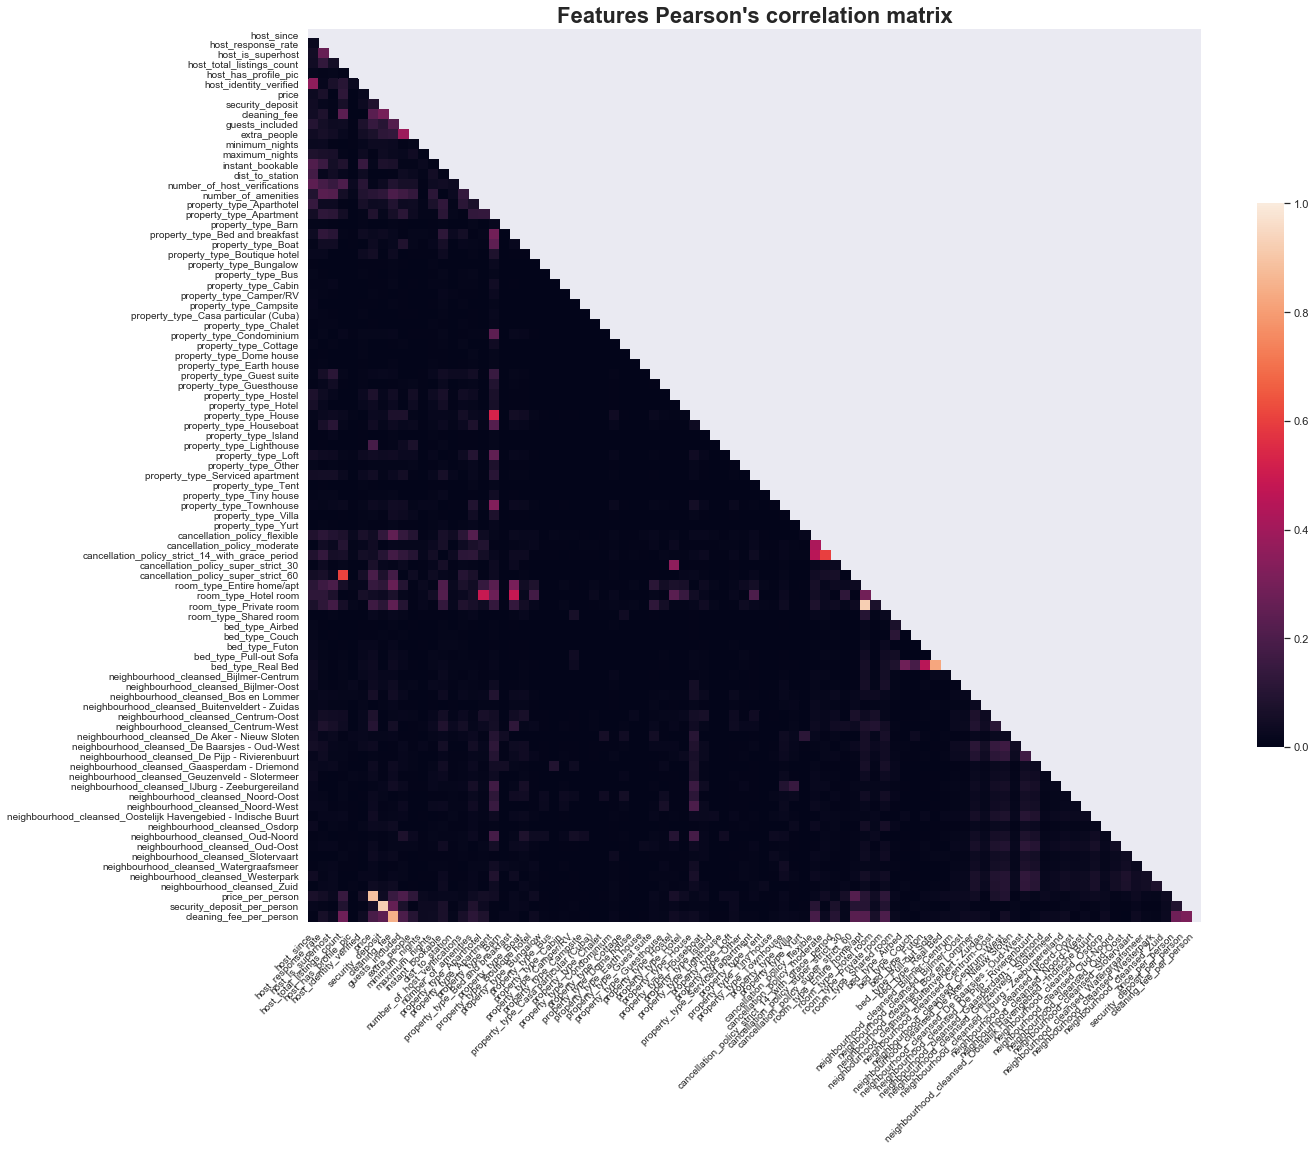

In [30]:
# first drop the 'id' column because it is not a feature
# done above
#df_features_ = df_features.drop(columns = ['id'])

df_features_ = df_features.copy()

# compute Pearson correlation matrix of features 
corr = df_features_.corr(method = 'pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the matrix as a heatmap
chart = sns.heatmap(abs(corr), mask=mask, square=True, cbar_kws={"shrink": .5}, xticklabels=True, yticklabels=True, vmin=0, vmax=1)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tick_params(labelsize=10)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right')
plt.title('Features Pearson\'s correlation matrix' , fontsize = 22, \
          fontweight='bold')
plt.show()

<font color='red'>   
    
HEATMAP A DIMINUER CAR TROP GRANDE

</font>

This heatmap of the Pearson correlation matrix shows that most of the features are mostly uncorrelated, meaning that most features bring information that can not be obtained from other features.

Few of them are highly correlated like `price_per_person` with `price`, or `security_deposit_per_person`and `security_deposit` which is expected as they respectively represent the same kind of measures. 


### Random forest

<font color='green'> 
__SINGLE LABEL RF__
</font> 

A Random Forest algorithm is used to classify features according to their importance and to study the influence of features over the overall prediction. This is of use to, for example, compare how the weight of different features changes for different metrics. The use of Random Forests could be extended to compare the results for different neibourhoods or even cities. 

Before running any algorithms, model parameters must be tuned and data must be normalized (or standardized) as well as separated into train and test sets. 

In [31]:
# for all these step random_seed is set to 1
random_seed = 1

In [32]:
# get the names of our success metrics in a list of strings
success_metrics_features = list(df_success_metrics.columns.values)

In [33]:
import importlib
from feature_tools import *

In [34]:
def perform_rf(metric, df_features_w_metrics, success_metrics_features, tune = False):
    '''
    takes the DataFrame containing features and metrics as argument, removes all metrics except one
    which becomes then the 'label' and finally performs the random forest on these datas
    '''
    df = df_features_w_metrics.copy()
    m = success_metrics_features.copy()
    m.remove(metric)
    df = df.drop(columns = m)
    print('Random forest of features for the metric: ' + metric)
    f = FeaturesTools(df, metric, random_seed = random_seed)
    norm_feat = f.preprocess_features(preprocessing_type = 'normalize')
    f = FeaturesTools(norm_feat, metric, random_seed = random_seed)
    imp, df_err, rf = f.randomForestAnalysis(plotResults = [True, False, True, False], tuneModelParameters = tune)
    return imp, df_err, rf, f

Random forest of features for the metric: review_scores_rating
> Running normalize_features...

> Running randomForestAnalysis...

> Running importance_df...

> randomForestAnalysis results...
R^2 OOB Score:          0.099983

> Performances comparison for the target(s) variables:

+-----------------------+------------------------+-------------+
|                       |  review_scores_rating  |     AVG     |
|-----------------------+------------------------+-------------|
|       R^2 error       |        0.127887        |  0.127887   |
|       MSE error       |      2.31837e-07       | 2.31837e-07 |
|       MAE error       |       0.00030685       | 0.00030685  |
|      MAPE error       |         5.5829         |   5.5829    |
| Median Absolute error |      0.000221629       | 0.000221629 |
+-----------------------+------------------------+-------------+


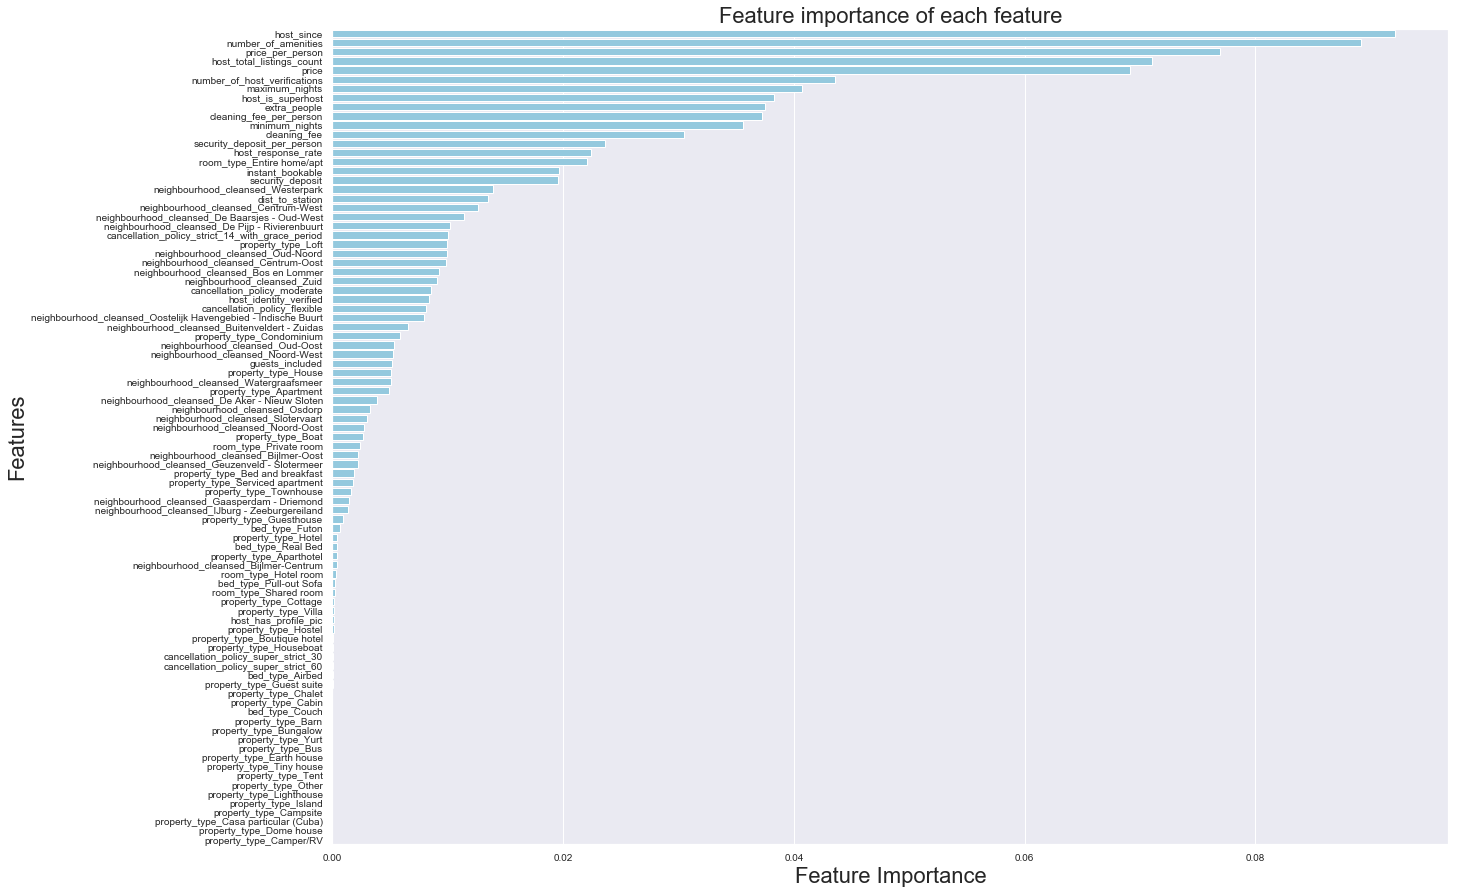

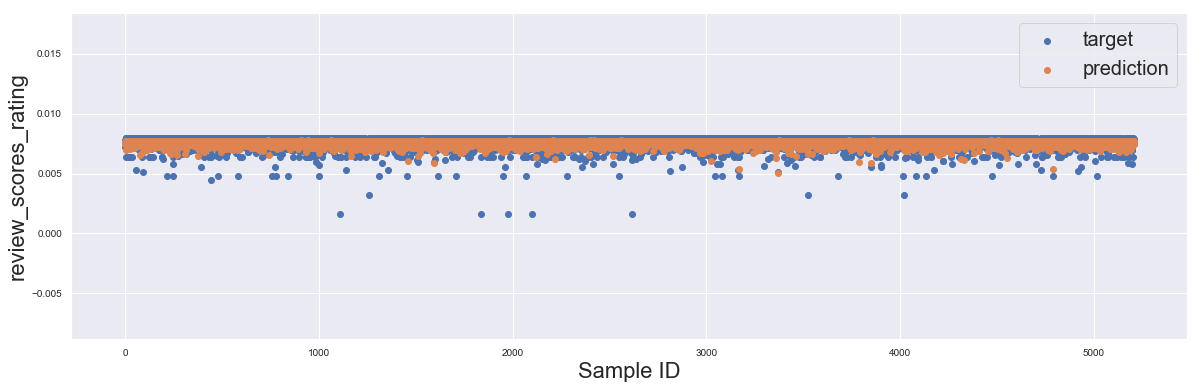

In [35]:
# perform random forest for each metric
metric1 = 'review_scores_rating'
imp1, df_err1, rf1, f1 = perform_rf(metric1, df_features_w_metrics, success_metrics_features)

Random forest of features for the metric: reviews_per_month
> Running normalize_features...

> Running randomForestAnalysis...

> Running importance_df...

> randomForestAnalysis results...
R^2 OOB Score:          0.514851

> Performances comparison for the target(s) variables:

+-----------------------+---------------------+-------------+
|                       |  reviews_per_month  |     AVG     |
|-----------------------+---------------------+-------------|
|       R^2 error       |      0.481816       |  0.481816   |
|       MSE error       |     1.92162e-05     | 1.92162e-05 |
|       MAE error       |     0.00242737      | 0.00242737  |
|      MAPE error       |       378.845       |   378.845   |
| Median Absolute error |     0.00125075      | 0.00125075  |
+-----------------------+---------------------+-------------+


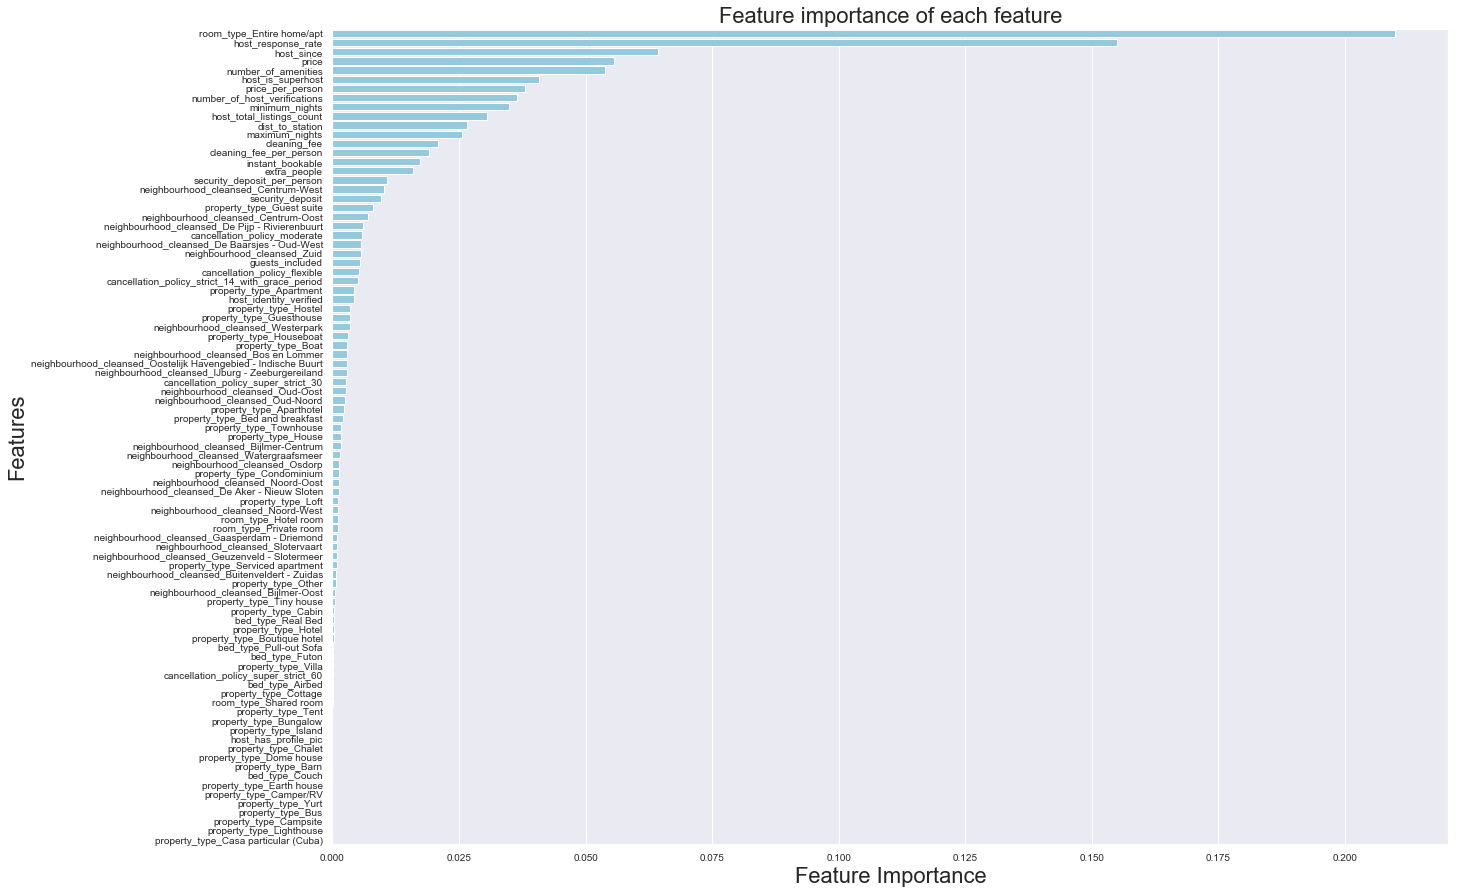

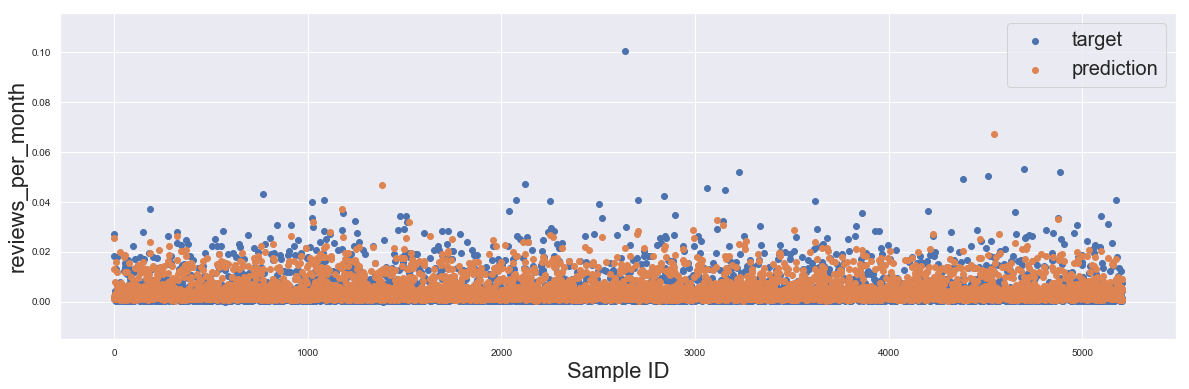

In [36]:
metric2 = 'reviews_per_month'
imp2, df_err2, rf2, f2 = perform_rf(metric2, df_features_w_metrics, success_metrics_features)

Random forest of features for the metric: compound
> Running normalize_features...

> Running randomForestAnalysis...

> Running importance_df...

> randomForestAnalysis results...
R^2 OOB Score:          -0.040937

> Performances comparison for the target(s) variables:

+-----------------------+-------------+-------------+
|                       |  compound   |     AVG     |
|-----------------------+-------------+-------------|
|       R^2 error       |  0.0161152  |  0.0161152  |
|       MSE error       | 3.00404e-06 | 3.00404e-06 |
|       MAE error       |  0.0011733  |  0.0011733  |
|      MAPE error       |     inf     |     inf     |
| Median Absolute error | 0.000776761 | 0.000776761 |
+-----------------------+-------------+-------------+


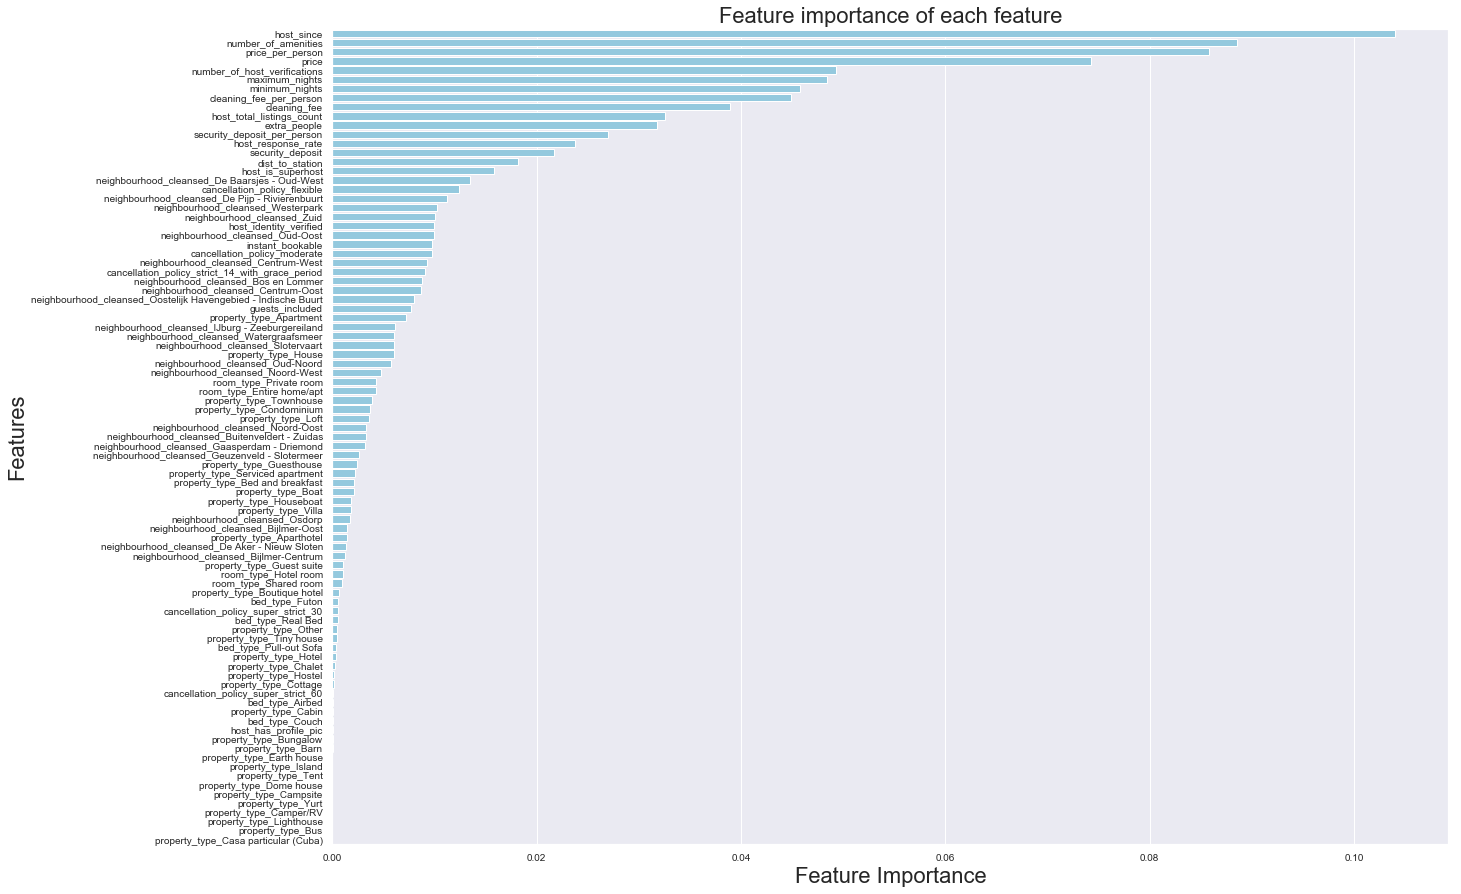

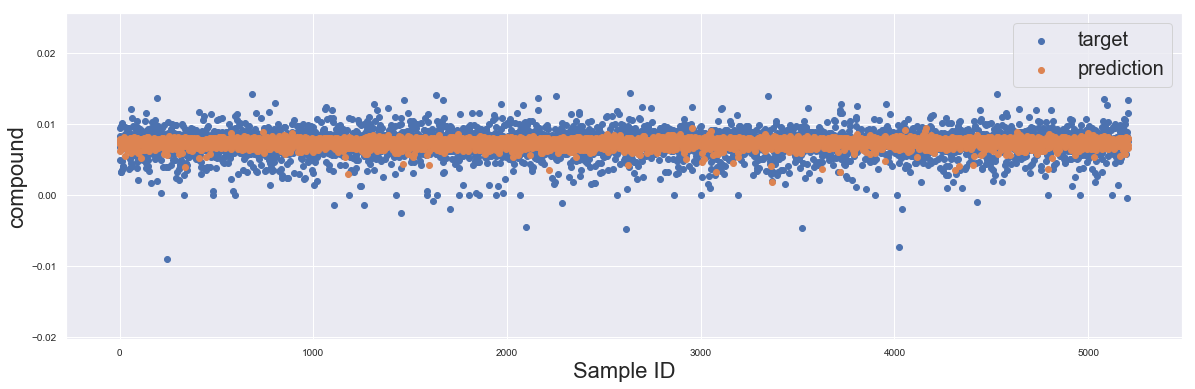

In [37]:
metric3 = 'compound'
imp3, df_err3, rf3, f3 = perform_rf(metric3, df_features_w_metrics, success_metrics_features)

<font color='red'>   

By plotting the relevance of features for each metric, we first observe that the importance of the features for the three metrics `review_scores_rating`, `positivity`and `negativity` ranges from 0.0 to 0.1 , while the importance of the features for the metric `reviews_per_month` ranges from 0.0 to 0.5. This wider range results from a single feature: `number_of_reviews`, which can be expected as the metric we chose to represent demand for a listing (`reviews_per_month`) is very likely to have been calculated from this particular feature. If we exclude this feature, we notice that all the following important features for `reviews_per_month` are in the range 0.0 to 0.1, similarly to the other metrics. 

Moreover, we notice that features describing types of property that are atypical for a city are found in the bottom of the ranking for all the metrics. This is most likely because none of these types of properties are offered in this city.

We set a cumulative importance threshold at 95%, as the plateau more or less reached above this amount. Features that come after the threshold being reached have such a small importance that they could potentially be discarded.  

By looking at the accuracies of the models built for each metric, we observe that `review_scores_rating` obtains the highest accuracy. However, as most of the R^2 scores and accuracies are inconclusive, we will perform an in depth debugging of this section for Milestone 3.

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND  
</font>

<font color='green'> 
__MULTILABEL RF__
</font> 

In [38]:
def perform_multilabel_RF(feat_df,process):
    
    f = feature_tools.FeaturesTools(df = feat_df[feat_df.columns.difference(rating_features[2:])],
                                 label_name = rating_features[0:2], random_seed = random_seed)
    processed_feat = f.preprocess_features(preprocessing_type = process)
    f = feature_tools.FeaturesTools(df = processed_feat[processed_feat.columns.difference(rating_features[2:])],
                                 label_name = rating_features[0:2], random_seed = random_seed)
    df_importance, df_err, rf = f.randomForestAnalysis(plotResults = [True, False, True, False], tuneModelParameters = False)
    
    return df_importance, df_err, rf

In [39]:
df_listings[rating_features].isna().any()

review_scores_accuracy         True
review_scores_cleanliness      True
review_scores_checkin          True
review_scores_communication    True
review_scores_location         True
review_scores_value            True
dtype: bool

In [40]:
# Multilabel prediction with normalization of features
# add other scorings
df_features_multi = pd.merge(df_features, df_listings[rating_features].dropna(), left_on = 'id', right_on = 'id')
rating_features.append('id') # /!\ rerunning this cell multiple times will add multiple id to rating_features
df_features_multi = df_features_multi.set_index('id')

# perform multilabel pred
norm_df_importance, norm_df_err, norm_rf = perform_multilabel_RF(df_features_multi,'normalize')

KeyError: 'id'

In [ ]:
# Multilabel prediction with standardization of features
stand_df_importance, stand_df_err, stand_rf = perform_multilabel_RF(df_features_multi,'standardize')

In [ ]:
# Multilabel prediction with robust standardization of features
rob_stand_df_importance, rob_stand_df_err, rob_stand_rf = perform_multilabel_RF(df_features_multi,'standardize_robust')

In [ ]:
# Multilabel prediction with scaling of features unit between [0,1]
scale_importance, scale_df_err, scale_rf = perform_multilabel_RF(df_features_multi,'scale_unit')

In [ ]:
# Cration of a df with the errors obtained with all types of features preprocess
frames = [norm_df_err,stand_df_err,rob_stand_df_err,scale_df_err]
df_error_viz = pd.concat(frames, keys=['NORMALISATION', 'STANDARDIZATION','ROBUST STANDARIZATION','UNIT SCALING'])
df_error_viz

### Top 10 important features analysis

<font color='green'> 
__MULTILABEL RF's RESULTS__
</font> 

In [ ]:
# based on results obtained with the normalization preprocessing of the features
imp_top = norm_df_importance.nlargest(10, ['feature_importance'])

In [ ]:
imp_top

<font color='green'> 
__SINGLE LABEL RF's RESULTS__
</font> 

In this section, we investigate the 10 most important features for each metric by investigating whether similar features are important for different metrics and by checking differences in importance. 
To do so, the first step was to isolate the top 10 features for each metric in a new dataframe, then to perform outer merges of these dataFrames together.

In [ ]:
# get the top 10 most important features of each metric

# metric 1 is reviews_score_rating
imp1_top = imp1.nlargest(10, ['feature_importance']).rename(columns={"feature_importance": success_metrics_features[0]})

# metric 2 is reviews_per_month
imp2_top = imp2.nlargest(10, ['feature_importance']).rename(columns={"feature_importance": success_metrics_features[1]})

# metric 3 is compound
imp3_top = imp3.nlargest(10, ['feature_importance']).rename(columns={"feature_importance": success_metrics_features[2]})

In [ ]:
# merge top 10 dataFrames
feat = pd.merge(imp1_top, imp2_top, on=['feature'], how='outer')
feat = pd.merge(feat, imp3_top, on=['feature'], how='outer')



In [ ]:
feat.columns.values

In [ ]:
# remove unnecessary columns and rename to have metrics names 
feat.drop(columns = ['std_x', 'std_y', 'std'], inplace = True)


From the dataframe displayed above, we notice that some values are NaN, this is due to features not being in the top 10 of the corresponding metric.

After that, as NaN values are uncompatible with heatmaps, they were replaced by 0 and displayed as a grey mask on the heatmap. 

In [ ]:
# get labels for the heatmap, fill NaN with 0 and set 'feature' as the index of the dataFrame
xlabels = feat.feature.tolist()
feat = feat.fillna(0)
feat = feat.set_index('feature')
ylabels = list(feat.columns.values) 

In [ ]:
# heatmap

# transpose 'feat' dataFrame to have features on x-axis and metrics on y-axis
feat_ = feat.transpose()

# plot
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.heatmap(feat_, mask = feat_== 0, vmin=0, vmax=0.15, square=True, cbar_kws={"shrink": .5}) #, center=0
ax.set_facecolor('grey')
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right', fontsize = 14)
ax.set_yticklabels(ylabels, verticalalignment='center', fontsize = 14)  
plt.xlabel('FEATURES', fontsize = 18)
plt.ylabel('METRICS', fontsize = 18)
plt.title('FEATURE IMPORTANCE OF TOP FEATURES FOR EACH METRIC' , fontsize = 18)
plt.show()

*Comment: All values above 0.15 are plotted in the same shade. This was done to reduce the range for visualization purposes, as all values except one are in the range [0, 0.15].*

From this heatmap, we first notice that many of the top ten features are common for most metrics, and that `number_of_reviews` is the most important for all of them. As was previously stated, `reviews_per_month` was most likely obtained from `number_of_reviews`, which explains why the importance of this feature is as high for this metric.

The importance of the top features seems to decrease progressively, in a similar manner for all the metrics except for `reviews_per_month`. In fact, for the latter, features do not follow the same order of importance (`host_since` for instance).  

### Analysis of random forest results

Here, Random Forest models are built for each of the target features independently. Then, to look at how much each feature contributes to the final prediction and how these contributions change if we use different target metrics (labels), a summarizing interactive sankey tree is constructed.

In [ ]:
# copy 
df_features_res = df_features.copy()

In [ ]:
# compute treeInterpreter for each metric
prediction1, bias1, contributions1 = f1.tree_Interpreter(rf1, df_features_res)
mean_features_contribution1 = np.mean(contributions1, axis=0)

prediction2, bias2, contributions2 = f2.tree_Interpreter(rf2, df_features_res)
mean_features_contribution2 = np.mean(contributions2, axis=0)

prediction3, bias3, contributions3 = f3.tree_Interpreter(rf3, df_features_res)
mean_features_contribution3 = np.mean(contributions3, axis=0)

In [ ]:
# create a dataFrame with contributions of the features for each metric
df_contributions = pd.DataFrame()
for i, m in zip(success_metrics_features, [mean_features_contribution1, mean_features_contribution2, 
                mean_features_contribution3]):
    
    df_contributions_tmp = pd.DataFrame({'feature_source': df_features_res.columns,
                                         'feature_target':[i]*len(df_features_res.columns),
                                         'contribution':m})

    df_contributions = pd.concat([df_contributions, df_contributions_tmp])

In [ ]:
# create the interactive sankey tree plot
labels = [x for x in df_features_res.columns.values] + success_metrics_features
ids = np.arange(0, len(labels))
replace_dict = {}
for ref_s, ref_id in zip(labels, ids):
    replace_dict.update({ref_s:ref_id})

df_contributions['source'] = df_contributions['feature_source'].replace(replace_dict)
df_contributions['target'] = df_contributions['feature_target'].replace(replace_dict)
labels = labels + [np.nan]*(df_contributions.shape[0]-len(labels))
df_contributions['labels'] = labels

fplot = FeaturesTools()

# this command displays the interactive plot + stores it in a .html file so that it remains displayed (see the cell below)
#fplot.interactive_sankey(df_contributions, 'Amsterdam\'s interactive sankey tree')

In [ ]:
# the interactive plot was saved in a .html file and is displayed here
from IPython.display import HTML
HTML(filename='./img/sankey_plot.html')

<font color='red'>   
    
*Comment: If this plot is not displayed, please open the sankey_plot.html which can be found in the img folder.*

This interactive tree allows the visualization of the contribution of each feature to each metric. 

When moving your cursor on the color tag of any of the features you can check the value `outgoing_flow_count`, which indicates how many of the metrics this features contributes to. Similarly, you can check the value of `incoming_flow_count` for each metric to see how many of the features contributed to this metric. You can also move features/metrics around by clicking on them and dragging them to another location.

When moving your cursor on the link between a given feature and a metric, you can check the source and the target of this link. Moreover, the width of the link indicates the importance of the contribution.

From this tree, we observe the following:
- `reviews_per_month` has 31 incoming contributions, but has 4 obvious contributions which are `number_of_reviews`, `price`, `price_per_person` and `minimum_nights`, all the other contributions are very small in comparison.

- `price` and `price_per_person` are redundant information and could be better selected in the next milestone. 

- `review_scores` has 25 incoming contributions that all have a small and similar width. The same can be said about `positivity`.

- the contributions to `negativity` have a similar pattern to those of `reviews_per_month`.


Features contributing the most to metrics are `number_of_reviews`, `price`, `price_per_person`,`minimum_nights`, `host_total_listings_count`, `neighbourhood_cleansed` and `host_total_listings_count`. This seems quite accurate, as these features contain typical information potential guests look for when searching for a place to stay.

TEXTE À REVOIR SI ON GARDE SEULEMENT COMPOUND  
</font>

### Sankey plot with colors

In [ ]:
# create an example of dataframe for the connections

importlib.reload(feature_tools)

df_contributions = pd.DataFrame()
neigh_ID   = 5
neigh_name = neigh_df[neigh_df['neighborhood_id'] == neigh_ID].neighbourhood.values[0]

idx = 0
for i in rating_features:
    # at each time use only one of the rating_features, exclude the others
    discard_feat = list(filter(lambda x : x != i, rating_features))
    feat_tmp = features[features.columns.difference(discard_feat)]
    
    f_i = feature_tools.FeaturesTools(df = feat_tmp, label_name = i, random_seed = random_seed)
    f_i.randomForestAnalysis(plotResults = [False, False, False, False], tuneModelParameters = False)
    
    tmp = feat_tmp.loc[features['neighbourhood_cleansed'] == neigh_ID].drop(i, axis = 1)
    prediction, bias, contributions = f_i.treeInterpreter(rf, tmp)
    mean_features_contribution = np.mean(contributions, axis=0)

    df_contributions_tmp = pd.DataFrame({'feature_source':tmp.columns,
                                         'feature_target':[i]*len(tmp.columns),
                                         'contribution':mean_features_contribution})
    
    df_contributions = pd.concat([df_contributions, df_contributions_tmp])
    idx += 1

    
labels = [x for x in features.columns.values if x not in rating_features] + rating_features
ids    = np.arange(0, len(labels))
replace_dict = {}
for ref_s, ref_id in zip(labels, ids):
    replace_dict.update({ref_s:ref_id})
df_contributions['source'] = df_contributions['feature_source'].replace(replace_dict)
df_contributions['target'] = df_contributions['feature_target'].replace(replace_dict)
labels = labels + [np.nan]*(df_contributions.shape[0]-len(labels))
df_contributions['labels'] = labels


In [ ]:
importlib.reload(feature_tools)


f2 = feature_tools.FeaturesTools()

nb_colors = len(df_contributions.target.unique())
colors = sns.color_palette('Set1', nb_colors)

# add souces/targets boxs colors
color_nodes = ['#808080'] * len([x for x in features.columns.values if x not in rating_features]) + colors.as_hex()
color_nodes = color_nodes + [np.nan]*(df_contributions.shape[0]-len(color_nodes))
df_contributions['color'] = color_nodes

# add trajectories colors
colors_trajectories = []
for target, color in zip(df_contributions.target.unique(), colors):
    df_tmp = df_contributions[df_contributions['target'] == target]
    target_color_scale   = sns.light_palette(color, 4, reverse = True)
    #print(target_color_scale)
    # convert color palette to string format style: rgba(253, 253, 253, 0.5)
    tmp = []
    for jj in target_color_scale:
        tmp = np.append(tmp, 'rgb' + str(tuple(int(np.ceil(i * 255)) for i in jj[0:3]) + (jj[3], )))
        #tmp = np.append(tmp, 'rgba' + str(jj))
    target_color_scale = tmp
    target_mapped_colors = f2.map_to_color(target_color_scale, df_tmp.contribution)
    colors_trajectories  = np.append(colors_trajectories, target_mapped_colors)
df_contributions['linkColor'] = colors_trajectories


# do sankey plot
f2.interactive_sankey(df_contributions, 'Features contributions for different target scores for neighborhood ' + neigh_name + ':')    

In [ ]:
#WHAT IS THIS CELL FOR ? WHERE IS TEST DEFINE? MIGHT NOT HAD TO COPY THAT ...

df_test = pd.DataFrame(test)
a = df_test.transpose()
a

In [ ]:
params = ['n_estimators', 'max_features', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'warm_start']

fig, ax = plt.subplots(2, 3, figsize = (20, 10))

y_train_mse = []
y_train_std = []
y_test_mse = []
y_test_std = []
best_train_idx = 1000
best_test_idx = 1000

idx = 0
for row in ax:
    for col in row:
        x_values = []

        for _, row in df_test.iterrows():

            x_values = np.append(x_values, row['params'][params[idx]])
            if idx == 0:
                y_train_mse = np.append(y_train_mse, row['mean_train_Accuracy'])
                y_train_std = np.append(y_train_std, row['std_train_Accuracy'])
                y_test_mse = np.append(y_test_mse, row['mean_test_Accuracy'])
                y_test_std = np.append(y_test_std, row['std_test_Accuracy'])
                #best_train_idx = np.argmin(y_train_mse)
                #best_test_idx = np.argmin(y_test_acc)

        col.scatter(x_values, y_train_mse, linestyle = '--', color = 'g', alpha = 0.7, label = 'MSE (train)')
        col.scatter(x_values, y_test_mse, linestyle = '-', color = 'k', label = 'MSE (test)')
        #col.fill_between(x_values, y_train_mse - y_train_std, y_train_mse + y_train_std, alpha = 0.1, color = 'g')
        #col.fill_between(x_values, y_test_mse - y_test_std, y_test_mse + y_test_std, alpha = 0.1, color = 'k')
        #col.plot([x_values[best_train_idx], ] * 2, [0, y_train_mse[best_train_idx]], linestyle='-.', color = 'g')
        #col.annotate("%0.2f" % y_train_mse[best_train_idx], (x_values[best_train_idx], y_train_mse[best_train_idx] + 0.5))
        #col.plot([x_values[best_test_idx], ] * 2, [0, y_test_mse[best_test_idx]], linestyle='-.', color = 'k', marker = 'x')
        #col.annotate("%0.2f" % y_test_mse[best_test_idx], (x_values[best_test_idx], y_test_mse[best_test_idx] + 0.5))
        col.set_xlabel(params[idx])
        col.set_ylabel('MSE')
        col.legend(loc = 'upper center')
        
        idx += 1
            
        

## Learn from the international hosts

If a host has multiple listings, maybe it is because it has a great success and because he knows how to do it. Check what determines the airbnb success in this case.

In [ ]:
# get all the listings_detailed.cvs files in the data_location folder

data_location = './data'
all_files = os.listdir(data_location)
listings_detailed = [i for i in all_files if 'listings_detailed.csv' in i]

# open all listings_detailed.csv files iteratively. For each file keep:
# the city and the average latitude, longitude
# the host ids
# the host names
# the host number of listings in a city
# those info are stored in df_world

df_world = pd.DataFrame()

idx_advancment = 0
for file in listings_detailed:
    idx_advancment += 1
    city_name = file.split('_')[1]
    print('> Analyzing city ' + str(int(idx_advancment)) + '/' + str(int(len(listings_detailed))) + ' : ' + city_name + '..................', end = '\r')
    tmp = pd.read_csv(data_location + '/' + file, low_memory = False)
    city_latitude = tmp.latitude.mean()
    city_longitude = tmp.longitude.mean()
    tmp['number_listings_by_host'] = tmp.groupby('host_id')['host_id'].transform('size')
    tmp = tmp.sort_values(by = 'number_listings_by_host', ascending = False)
    tmp = tmp.groupby(['host_id', 'host_name']).size().sort_values(ascending = False).to_frame().reset_index()
    tmp.columns = ['host_id', 'host_name', 'nb_listings_city']
    tmp['city'] = city_name
    tmp['city_avg_latitude'] = city_latitude
    tmp['city_avg_longitude'] = city_longitude
    
    df_world = pd.concat([df_world, tmp])
print('\n')

In [ ]:
df_world.head()

Now we can extract for example a list of hosts names and ids (use both to avoid duplicates) that have for example more than one listing or that are active in more than one city. As example, hosts active in more than one city are extracted here.

In [ ]:
# always use double control host_id AND host_name to be sure to avoid duplicated names [very probables in the whole world !!!]

df_multiple = df_world.copy()
df_multiple['host_nb_city_presence'] = df_multiple.groupby(['host_id', 'host_name'])['city'].transform('size')
df_multiple['nb_listings_world'] = df_multiple.groupby(['host_id', 'host_name'])['nb_listings_city'].transform('sum')
df_multiple = df_multiple[df_multiple['host_nb_city_presence'] > 1].sort_values(by = 'host_nb_city_presence', ascending = False)

display(df_multiple.head())

plt.scatter(df_multiple.host_nb_city_presence, df_multiple.nb_listings_world)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel('Number of cities where international hosts are present', size = 22)
plt.ylabel('Number of total listings in the world', size = 22)
plt.tick_params(labelsize = 10)
plt.show()

In [ ]:
# aggregate df_multiple
df_multiple = df_multiple.groupby(['host_id', 'host_name']).aggregate(lambda x: x.unique().tolist()).reset_index()

display(df_multiple.head())

Now that we have the list, we can go in all the datasets and extract the rows of all those hosts. Then we run the ML model again. 

NOTE: this could be done better. In fact, we don't have to open all the cities datasets if we already know in which cities are located those hosts: better to open only the corresponding cities .csv files !

--> Pseudocode:

for file in listings_detailed:

    for _, row in df_multiple.iterrows():

        for city in row.city:
    
            if city corresponds to file, open it. Otherwise skip. (!!! Must control lowercase/uppercase. An idea would be to do a case-insensitive comparison)

In [ ]:
df_international_hosts = pd.DataFrame()

idx_advancment = 0
t0 = time.time()
for file in listings_detailed:
    idx_advancment += 1
    city_name = file.split('_')[1]
    print('> Analyzing city ' + str(int(idx_advancment)) + '/' + str(int(len(listings_detailed))) + ' : ' + city_name + '..................', end = '\r')
    tmp = pd.read_csv(data_location + '/' + file, low_memory = False)
    
    for _, row in df_multiple.iterrows():
        tmp2 = tmp[(tmp['host_id'] == row['host_id']) & (tmp['host_name'] == row['host_name'])]
        if tmp2.shape[0] > 0:
            df_international_hosts = pd.concat([df_international_hosts, tmp2], sort = True)
print('\n')
print('All the international DataSet is collected!\nElapsed time.... %f'%(time.time()-t0))

In [ ]:
for _, row in df_multiple.iterrows():
    for city in row.city:
        print(city)

In [ ]:
df_international_hosts.head()df_international_hosts.to_csv('df_international_hosts.csv', index = False)

### Clean the international dataset

In [ ]:
cu       = CleaningUtility()
features_international = df_international_hosts[features_ensemble].copy()
features_international = cu.bool_to_int(features_international, bool_features)
features_international = cu.host_activity_period(features_international, date_features)
features_international = cu.list_to_number_of_services(features_international, list_features)
features_international = cu.format_price(features_international, price_features)
features_international = cu.format_rate(features_international, rate_features)
features_international = cu.replace_nan_by_values(features_international, replace_nan_features, replace_values)
# TODO: appropriate also for property_type or should create macro groups such as house, ... Same for room_type and bed_type
features_international = cu.convert_to_one_hot_label(features_international, string_features)
features_international = cu.prices_per_person(features_international, price_features[0:-1], 'guests_included')


features_international = features_international.drop('neighbourhood_cleansed', axis = 1)
# list of IDs
# print('> The unique properties in the dataset are:')
# reference_strings = df['property_type'].unique()
# reference_IDs     = [0]
# print(reference_strings)

##############################################################
## now that all the data are numeric, convert all to float64 #
##############################################################
cols           = features_international.columns
#display(features_international)
features_international[cols] = features_international[cols].apply(pd.to_numeric, errors = 'raise')

##############################################################
############# keep only rows with non-nan values #############
##############################################################
tmp      = features_international.shape[0]
features_international = cu.select_numeric_column_only(features_international)
features_international = features_international.dropna()

##############################################################
##################### print cleaning info ####################
##############################################################
print('\nNumber of rows    before data set cleaning:       %.0f'%(df_international_hosts.shape[0]))
print(  'Number of rows    after data set cleaning:        %.0f'%(tmp))
print(  'Number of rows    after removal of rows with nan: %.0f'%(features_international.shape[0]))
print(  'Number of columns before data set cleaning:       %.0f'%(df_international_hosts.shape[1]))
print(  'Number of columns initially selected:             %.0f'%len(selected_features))
print(  'Number of columns after data set cleaning:        %.0f'%(features_international.shape[1]))

display(features_international.head())

In [ ]:
print('The columns with inf values are:')
print(features_international.columns.to_series()[np.isinf(features_international).any()])

print(features_international.shape)
features_international = features_international.replace([np.inf, -np.inf], np.nan)
features_international = features_international.dropna()
print(features_international.shape)

In [ ]:
# Multilabel prediction with normalization of features
ww_df_importance, ww_df_err, ww_rf = perform_multilabel_RF(features_international,'normalize')

Interestingly, we observe that some of the most important features have changed. Moreover, the top 4 features for the international hosts have a similar importance. From the previous analyses we found that even among the top 4 features there was a significant importance difference (not all in the similar importance range)

## Create interactive network graph showing for each international host the cities in which is present

In [ ]:
import os
import json
import flask
import itertools
import pandas as pd
import networkx as nx
from networkx.readwrite import json_graph

In [ ]:
nb_cities_min = 10

df_multiple = df_world.copy()
df_multiple['host_nb_city_presence'] = df_multiple.groupby(['host_id', 'host_name'])['city'].transform('size')
df_multiple['nb_listings_world'] = df_multiple.groupby(['host_id', 'host_name'])['nb_listings_city'].transform('sum')
df_multiple = df_multiple[df_multiple['host_nb_city_presence'] >= nb_cities_min].sort_values(by = 'host_nb_city_presence', ascending = False)
df_multiple = df_multiple.groupby(['host_id', 'host_name']).aggregate(lambda x: x.unique().tolist())
display(df_multiple.head(2))

In [ ]:
edges = pd.DataFrame()

for index, row in df_multiple.iterrows():
    tmp0 = row['city']
    tmp1 = row['city'][1:] + [row['city'][0]]
    
    connections = pd.DataFrame({'source':row['city'], 'target':row['city'][1:] + [row['city'][0]]})
    
    edges = pd.concat([edges, connections])


    
edges = edges.reset_index(drop = True).drop_duplicates()
print(edges.shape)
edges.head()

In [ ]:
G = nx.DiGraph()

for index, row in edges.iterrows():
    G.add_edge(row.source, row.target)

for n in G:
    G.node[n]['name'] = n

# write json formatted data
d = json_graph.node_link_data(G)  # node-link format to serialize
# write json
json.dump(d, open('force/force.json', 'w'))
print('Wrote node-link JSON data to force/force.json')

# Serve the file over http to allow for cross origin requests
app = flask.Flask(__name__, static_folder='force')


@app.route('/')
def static_proxy():
    return app.send_static_file('force.html')


print('\nGo to http://localhost:8000 to see the example\n')
app.run(port=8000)

## Further analysis

- From a dataset containing information about public transportation systems (source: citylines.co) in different cities, we have already built ready-to-use data that will be used to build additional features for our analysis. (see dist_to_staion.ipynb for exploration of the transportation dataset and stations.py for source code to use in our analysis, however we noticed that the csv data lacked in some information and new code was implemented in NearestStation_simple.ipynb that manipulates .json files, as they seemed to be more complete).

- We will improve the Random Forest model, for example with hyperparameter tuning (this has already been tried, unsuccessfuly) or by allowing for multitarget predictions.

- Compare results for multiple cities.

- Build visual representations via folium maps, exploiting classes already coded (MapClass.ipynb and MapMovies.ipynb).